## EXPERIMENT 1: MagFace

In [1]:
## Load libraries

import numpy as np
import cv2
from matplotlib import pyplot as plt
import torch
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import normalize
import sys
sns.set(style="white")
%matplotlib inline
sys.path.append('../../utils')
from Model_utils.Model_funcs import *
from Result_metric_utils.result_metrics import *
from Data_proc_utils.Data_proc_funcs import *
from DET_utils.DET_plots import *
from DET_utils.DET import *
from Plotting_stats_utils.plotting_threshold import *
from Plotting_stats_utils.stats_tables import *
from IPython import embed

from scipy.stats import describe, gaussian_kde
import math


In [2]:
# Save figures
from matplotlib import pyplot as plt
save_fig_path = '../../figures/mag_1_1/'


### MagFace Results

This notebook loads the feature vectors from MagFace and run them through the results metrics:
FNIR, FPIR, FND, FPD, and GARBE

# Load data

In [3]:
feature_list_children = '../../data/data_full/feature_vectors/magface_feature_vectors/1.1/feature_vectors_from_children_filtered_bibel_FINAL_INFERENCE_baseline_ex_1_1.list'
feature_list_adults = '../../data/data_full/feature_vectors/magface_feature_vectors/feature_vectors_from_adults_bibel_cropped_retina_all.list'

def load_and_compute_similarity(feature_list, dtype=np.float32):
    # Load data
    image_names, ids, num_ids, norm_feats = load_magface_vectors(feature_list)

    # Convert dtype to reduce memory usage
    norm_feats = norm_feats.astype(dtype)

    # Compute similarity matrix incrementally if possible
    sim_mat = np.dot(norm_feats, norm_feats.T)

    return image_names, ids, num_ids, sim_mat


In [4]:
# Load and compute for children
image_names_c, ids_c, num_ids_c, sim_mat_c = load_and_compute_similarity(feature_list_children)


/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_5.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_89/Indian_89_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Indian_m.04n3v0_/m.04n3v0__0002.jpg
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_1.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_3.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_270/Asian_270_2.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_19.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Asian_344/Asian_344_21.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_26.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_167/Caucasian_167_38.png
/data/data_full/children_filtered_bibel_FINAL_INFERENCE/Caucasian_16

In [5]:

# Load and compute for adults
image_names_a, ids_a, num_ids_a, sim_mat_a = load_and_compute_similarity(feature_list_adults)


/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0003.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.02nrz2/m.02nrz2_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.01241v/m.01241v_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0002.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/African_m.05zn751/m.05zn751_0004.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.04n3v0_/m.04n3v0__0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0001.jpg
/data/data_full/adults_filtered_bibel_cropped_resized_retina/Indian_m.0kvkdqp/m.0kvkdqp_0004.jpg
/data/data_full/adults_filtered_bib

In [6]:


# Dataframes with info, removes names not in magface results
children_all = pd.read_csv('../../data/image_info_csvs/final_filtered_children_df_BIBEL.csv')
children_all = children_all[children_all.image_name.isin(image_names_c)]

adults_all_org = pd.read_csv('../../data/image_info_csvs/final_filtered_adults_df_BIBEL.csv')
adults_all = adults_all_org[adults_all_org.image_name.isin(image_names_a)]

# Find the threshold

In [7]:
random_states = [1,2]
percentiles = np.arange(0.0, 1.0, 0.03).tolist()

df_all_threshold_x = compute_metrics_ex_1_1(random_states, percentiles, children_all, adults_all, image_names_c, image_names_a, sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data, balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE)


FPD result:  0.0
FND result:  0.08735883078675145
GARBE result, GARBE close to 1 means more unfair:  0.0655191230900636
Done for random_state: 1, percentile: 0.0
FPD result:  0.0
FND result:  0.08421229425596237
GARBE result, GARBE close to 1 means more unfair:  0.06315922069197177
Done for random_state: 1, percentile: 0.03
FPD result:  0.0
FND result:  0.3082535551631192
GARBE result, GARBE close to 1 means more unfair:  0.2311901663723394
Done for random_state: 1, percentile: 0.06
FPD result:  0.0
FND result:  0.31747401017474014
GARBE result, GARBE close to 1 means more unfair:  0.2381055076310551
Done for random_state: 1, percentile: 0.09
FPD result:  0.0
FND result:  0.25969714618520673
GARBE result, GARBE close to 1 means more unfair:  0.19477285963890506
Done for random_state: 1, percentile: 0.12
FPD result:  0.0
FND result:  0.16885149415447176
GARBE result, GARBE close to 1 means more unfair:  0.12663862061585382
Done for random_state: 1, percentile: 0.15
FPD result:  0.0
FND 

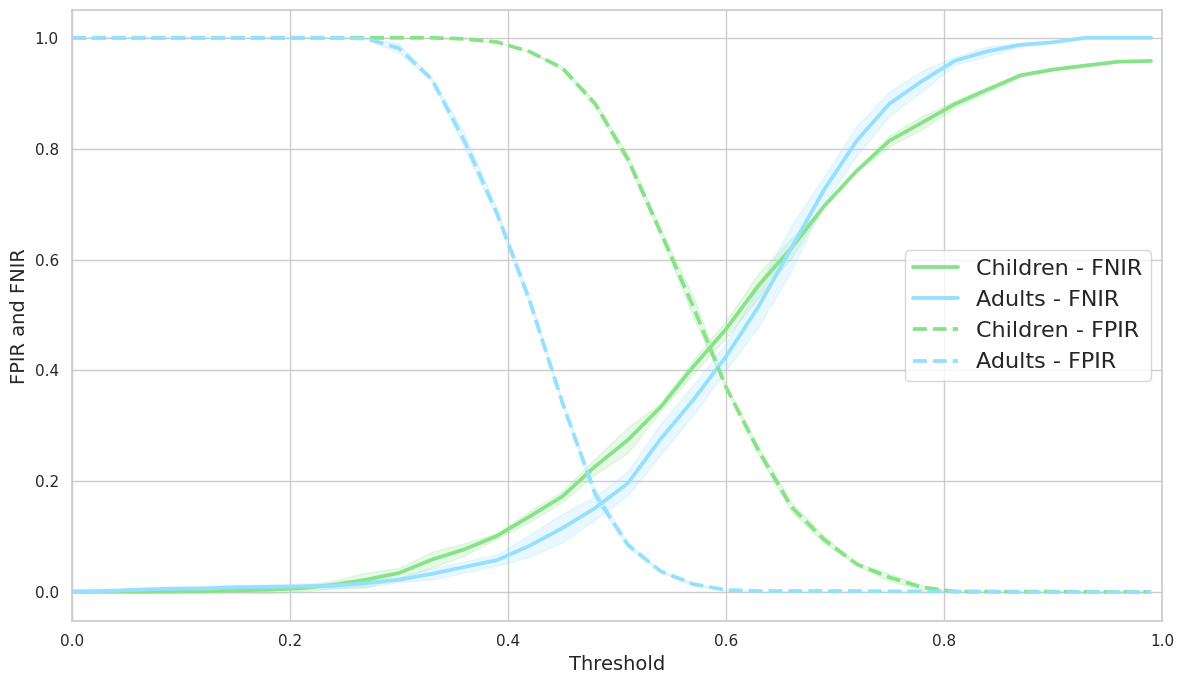

In [9]:

plot_threshold_metrics_ex_1_1_together_w_conf(df_all_threshold_x, 'MagFace ex. 1.1', save_fig_path)

### the threshold should be 32

# Stats - 10 experiments

In [ ]:

random_states = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

df_all_results, sim_mat_dict_all_magface_ex1_1 = evaluate_metrics_ex_1_1(
    random_states, children_all, adults_all, image_names_c, image_names_a,
    sim_mat_c, sim_mat_a, num_ids_c, num_ids_a, ids_c, ids_a, balance_child_data,
    balance_adults_data_enrolled, compute_fnir, compute_fpir, GARBE, remove_ones, 0.320#df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
)


In [ ]:
# Generate the LaTeX table
latex_table = generate_latex_table(df_all_results.applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)


In [ ]:
latex_table = generate_latex_table(df_all_results.describe().applymap(lambda x: f"{x:.3f}").drop(columns='Iteration'))
print(latex_table)

In [ ]:
df_all_results.to_csv('df_all_results_mag_1_1.csv', index=False)


# Stats

In [ ]:
import scipy.stats as stats
t_statistic, p_value = stats.ttest_rel(df_all_results['FNIR_c'], df_all_results['FNIR_a'])

# Output the results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Gemmer simscores

In [ ]:
df_all_results.to_csv('results_10_experiment_1_1_magface.csv')

In [ ]:
def concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, prefix, output_filename, iterations=10):
    # List to hold all the arrays
    iterations_list = []

    # Loop to access each array and append it to the list
    for i in range(1, iterations + 1):
        key = f'{prefix}_iteration_{i}'
        if key in sim_mat_dict_all_magface_ex1_1:
            iterations_list.append(sim_mat_dict_all_magface_ex1_1[key])

    # Concatenate all arrays into one big array
    all_iterations_array = np.concatenate(iterations_list)
    all_iterations_df = pd.DataFrame(all_iterations_array)

    # Save to CSV
    all_iterations_df.to_csv(output_filename, index=False)

    # Print the length of the big array
    print(len(all_iterations_df))

# Example usage
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_c_enrolled', 'sim_mat_c_enrolled_iterations_all.csv')
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_a_enrolled', 'sim_mat_a_enrolled_iterations_all.csv')
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_c_non_enrolled', 'sim_mat_c_non_enrolled_iterations_all.csv')
concatenate_and_save_arrays(sim_mat_dict_all_magface_ex1_1, 'sim_mat_a_non_enrolled', 'sim_mat_a_non_enrolled_iterations_all.csv')


# Loading pre-saved stuff

In [ ]:
sim_mat_c_enrolled_iterations_all = (pd.read_csv('sim_mat_c_enrolled_iterations_all.csv')).values.flatten()
sim_mat_a_enrolled_iterations_all = (pd.read_csv('sim_mat_a_enrolled_iterations_all.csv')).values.flatten()
sim_mat_c_non_enrolled_iterations_all = (pd.read_csv('sim_mat_c_non_enrolled_iterations_all.csv')).values.flatten()
sim_mat_a_non_enrolled_iterations_all = (pd.read_csv('sim_mat_a_non_enrolled_iterations_all.csv')).values.flatten()


In [ ]:

def descriptive_statistics(mated_scores, nonmated_scores):
    stats_labels = ["Observations", "Minimum", "Maximum", "Mean", "St. Dev.", "Skewness", "Ex. Kurtosis"]
    mated_stats = describe(mated_scores)
    mated_stats = [mated_stats.nobs, mated_stats.minmax[0], mated_stats.minmax[1], mated_stats.mean, math.sqrt(mated_stats.variance), mated_stats.skewness, mated_stats.kurtosis]
    nonmated_stats = describe(nonmated_scores)
    nonmated_stats = [nonmated_stats.nobs, nonmated_stats.minmax[0], nonmated_stats.minmax[1], nonmated_stats.mean, math.sqrt(nonmated_stats.variance), nonmated_stats.skewness, nonmated_stats.kurtosis]

    stats_system_df = pd.DataFrame(np.array([stats_labels, mated_stats, nonmated_stats]).T, columns=["Statistic", "Mated", "Non-mated"])
    stats_system_df = stats_system_df.astype({"Statistic": str, "Mated": float, "Non-mated": float})
    return stats_system_df

In [ ]:
mated_scores1 = sim_mat_a_enrolled_iterations_all
nonmated_scores1 = sim_mat_a_non_enrolled_iterations_all
scores_type1 = "similarity"
stats_system1_df = descriptive_statistics(mated_scores1, nonmated_scores1)
display(stats_system1_df)

In [ ]:
mated_scores2 = sim_mat_c_enrolled_iterations_all
nonmated_scores2 = sim_mat_c_non_enrolled_iterations_all
scores_type2 = "similarity"
stats_system2_df = descriptive_statistics(mated_scores2, nonmated_scores2)
display(stats_system2_df)

In [ ]:
mated_colour = "green"
mated_label = "Mated scores"
nonmated_colour = "red"
nonmated_label = "Non-mated scores"

figure_size = (12,6)
alpha_shade = 0.25
alpha_fill = 1.0
linewidth = 2
legend_loc = "upper left"
legend_anchor = (1.0, 1.02)
legend_cols = 1
legend_fontsize = 16
label_fontsize = 20

threshold_colour = "black"
threshold_style = "--"
round_digits = 5
sns.set(style="white", palette="muted", color_codes=True)
plt.rc("axes", axisbelow=True)

In [ ]:


# def plot_histogram(mated_scores, nonmated_scores, normalise=True, savename=None, title="Histogram", save_fig_path="save_fig_path", gem_som = 'A1'):
#     def normalise_scores(distribution):
#         return np.ones_like(distribution) / len(distribution)

#     mated_mean = np.mean(mated_scores)

#     plt.figure(figsize=(10, 6))

#     if normalise:
#         plt.hist(mated_scores, bins=50, weights=normalise_scores(mated_scores), color='green', alpha=0.5, label='Mated Scores')
#         plt.hist(nonmated_scores, bins=30, weights=normalise_scores(nonmated_scores), color='red', alpha=0.5, label='Non-mated Scores')
#         ylabel = "Probability Density"
#     else:
#         plt.hist(mated_scores, bins=50, color='green', alpha=0.5, label='Mated Scores')
#         plt.hist(nonmated_scores, bins=30, color='red', alpha=0.5, label='Non-mated Scores')
#         ylabel = "Count"

#     plt.axvline(mated_mean, color='darkgreen', linestyle='--', linewidth=2, label=f'Mated Mean: {mated_mean:.2f}')

#     plt.xlabel("Comparison Score", size=16)
#     plt.ylabel(ylabel, size=16)
#     plt.title(title, size=20)
#     plt.grid(True)
#     plt.legend(loc='upper right', bbox_to_anchor=(1, 1), ncol=1, fontsize=14)  # Adjust legend parameters as needed

#     plt.savefig(f'{save_fig_path}{gem_som}.png')

#     plt.show()

plot_histogram(mated_scores1, nonmated_scores1, normalise=True, title = 'Adults - MagFace ex. 1.1 ', save_fig_path=save_fig_path, gem_som = 'A1')


In [ ]:
plot_histogram(mated_scores2, nonmated_scores2, normalise=True, title = 'Children - MagFace ex. 1.1 ', save_fig_path=save_fig_path, gem_som='C1')


# DET curves

In [ ]:
d_prime_system1 = d_prime(mated_scores1, nonmated_scores1)
print("d' child =", round(d_prime_system1, round_digits))

d_prime_system2 = d_prime(mated_scores2, nonmated_scores2)
print("d' adult =", round(d_prime_system2, round_digits))


In [ ]:
# threshold1 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
threshold1 = 0.320
kde_with_threshold(mated_scores1, nonmated_scores1, scores_type1, threshold1, save_fig_path=save_fig_path, title='A2')

In [ ]:
# threshold2 = df_all_threshold_x[df_all_threshold_x.FNIR_c <0.05].Threshold.max()
threshold2 = 0.320
kde_with_threshold(mated_scores2, nonmated_scores2, scores_type2, threshold2, save_fig_path=save_fig_path, title='C2')

In [ ]:


def DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, score_type= "similarity",title = 'Adults vs Children - MagFace ex. 2.2', save_fig_path= 'save_fig_path'):
    figure_size = (12,7)
    alpha_shade = 0.25
    alpha_fill = 1.0
    linewidth = 2
    legend_loc = "upper left"
    legend_anchor = (1.0, 1.02)
    legend_cols = 1
    legend_fontsize = 18
    label_fontsize = 18
    tick_fontsize = 18
    system_name1 = 'Adults'
    system_name2 = 'Children'

    det = DET(biometric_evaluation_type='identification', abbreviate_axes=True, plot_eer_line=True)#, plot_title=title)
    det.x_limits = np.array([1e-5, .8])
    det.y_limits = np.array([1e-5, .8])
    det.x_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
    det.x_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
    det.y_ticks = np.array([1e-4, 1e-3, 1e-2, 5e-2, 20e-2, 40e-2, 80e-2])
    det.y_ticklabels = np.array(['0.01','0.1', '1', '5', '20', '40', '80'])
    det.create_figure()
    det.plot(tar=adjust_scores_for_DET(mated_scores1, scores_type1), non=adjust_scores_for_DET(nonmated_scores1, scores_type1), label=system_name1)
    det.plot(tar=adjust_scores_for_DET(mated_scores2, scores_type2), non=adjust_scores_for_DET(nonmated_scores2, scores_type2), label=system_name2)
    det.legend_on(loc="upper right")
    det.show()

DET_plotting_1_1(mated_scores1, mated_scores2,nonmated_scores1, nonmated_scores2, "similarity",'Adults vs Children - MagFace ex. 1.1', save_fig_path)


In [ ]:
import numpy as np
from scipy.integrate import simps
import matplotlib.pyplot as plt

def calculate_auc(tar, non, axes_transform, dissimilarity_scores=False):
    """
    Calculate the Area Under the Curve (AUC) for the DET plot.

    :param tar: Target scores (true positives)
    :param non: Non-target scores (false positives)
    :param axes_transform: Function to transform axes
    :param dissimilarity_scores: Boolean indicating if the scores are dissimilarity scores
    :return: AUC value
    """
    if dissimilarity_scores:
        tar = -np.array(tar)
        non = -np.array(non)

    # Compute ROC-like points
    fpr, tpr = compute_roc(tar, non)
    fpr, tpr = filter_roc(fpr, tpr)

    # Transform to linear scale for integration
    fpr_linear = axes_transform(fpr)
    tpr_linear = axes_transform(tpr)

    # Use the trapezoidal rule to integrate the curve
    auc = simps(tpr_linear, fpr_linear)

    return auc

def compute_roc(tar, non):
    """
    Compute ROC-like points.

    :param tar: Target scores (true positives)
    :param non: Non-target scores (false positives)
    :return: FPR and TPR
    """
    num_tar = len(tar)
    num_non = len(non)
    thresholds = np.unique(np.concatenate((tar, non)))
    fpr = np.array([(non >= t).mean() for t in thresholds])
    tpr = np.array([(tar >= t).mean() for t in thresholds])
    return fpr, tpr

def filter_roc(fpr, tpr):
    """
    Filter the ROC points to make it steppy for DET plot.

    :param fpr: False Positive Rate
    :param tpr: True Positive Rate
    :return: Filtered FPR and TPR
    """
    unique_fpr, indices = np.unique(fpr, return_index=True)
    unique_tpr = tpr[indices]
    return unique_fpr, unique_tpr

def probit(p):
    """
    Probit function for transforming axes.
    """
    return np.sqrt(2) * scipy.special.erfinv(2 * p - 1)



auc1 = calculate_auc(mated_scores1, nonmated_scores1, probit)
auc2 = calculate_auc(mated_scores2, nonmated_scores2, probit)

print(f"AUC for Adults: {auc1}")
print(f"AUC for Children: {auc2}")
